<h2 align=center> Principal Component Analysis</h2>

In this project, you will do all the machine learning without using any of the popular machine learning libraries such as scikit-learn and statsmodels. The aim of this project and is to implement all the machinery of the various learning algorithms yourself, so you have a deeper understanding of the fundamentals. By the time you complete this project, you will be able to implement and apply PCA from scratch using NumPy in Python, conduct basic exploratory data analysis, and create simple data visualizations with Seaborn and Matplotlib.


Following steps are performed:

- Introduction and Overview

- Load the Data and Libraries

- Visualize the Data

- Data Standardization

- Compute the Eigenvectors and Eigenvalues

- Singular Value Decomposition (SVD)

- Selecting Principal Components Using the Explained Variance

- Project Data Onto a Lower-Dimensional Linear Subspace

### Load the Data and Libraries
---

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                   header = None)

iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

iris.dropna(how = 'all', inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.columns=['sepal_length', 'sepal_width', 'petal_lenth', 'petal_width', 'species']
iris.dropna(how = "all", inplace = True)
iris.head()

,sepal_length,sepal_width,petal_lenth,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_lenth     150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Visualize the Data
---

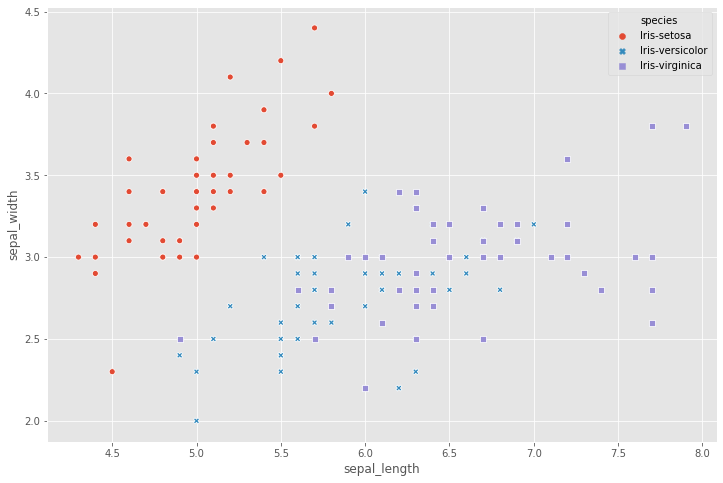

In [7]:
sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width,
               hue = iris.species, style = iris.species);

### Standardize the Data
---

In [8]:
from sklearn.preprocessing import StandardScaler
X = iris.iloc[:, 0:4].values
y = iris.species.values

In [9]:
X = StandardScaler().fit_transform(X)

### Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [10]:
covariance_matrix = np.cov(X.T)
print("Covariance matrix: \n", covariance_matrix)

Covariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [11]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigen Vector: \n", eigen_vectors, "\n")
print("Eigen Values: \n", eigen_values)

Eigen Vector: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigen Values: 
 [2.93035378 0.92740362 0.14834223 0.02074601]


### Singular Value Decomposition (SVD)
---

In [12]:
eigen_vec_svd, _, _ = np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

### Picking Principal Components Using the Explained Variance
---

In [13]:
for val in eigen_values:
    print(val)

2.9303537755893165
0.9274036215173417
0.1483422264816399
0.02074601399559571


In [14]:
variance_explained = [(i / sum(eigen_values)) * 100 for i in eigen_values]
variance_explained

[72.77045209380134, 23.030523267680643, 3.683831957627389, 0.5151926808906266]

In [15]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

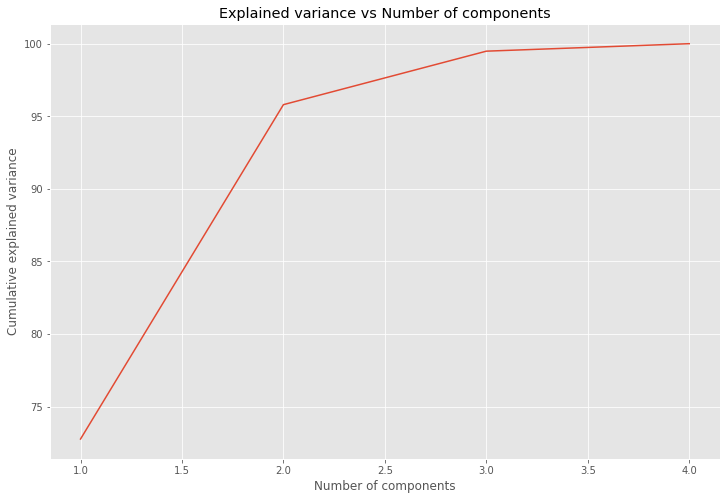

In [16]:
sns.lineplot(x = [1,2,3,4], y = cumulative_variance_explained);
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

### Project Data Onto Lower-Dimensional Linear Subspace
---

In [17]:
projection_matrix = (eigen_vectors.T[:][:])[:2].T

print("Projection matrix: \n", projection_matrix)

Projection matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [18]:
X_pca = X.dot(projection_matrix)

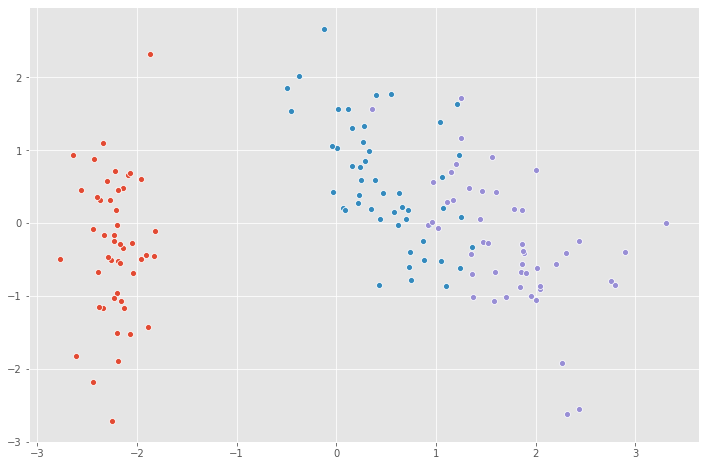

In [19]:
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot(X_pca[y==species, 0],
                   X_pca[y==species, 1])

This Project done as a part of Guided Project "Principal Component Analysis with NumPy" on Coursera.